In [1]:
import pandas as pd 
import numpy as np
import sklearn 
from sklearn.preprocessing import OneHotEncoder 

In [2]:
#!pip install pyarrow

In [3]:
# Extracting the import data links 
yellow_jan = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"
yellow_feb = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet" 

In [4]:
#Reading in the data 

jan_data = pd.read_parquet(yellow_jan)
feb_data = pd.read_parquet(yellow_feb)

In [5]:
#Previewing the read data 
jan_data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [6]:
#Extracting duration information 
jan_data['duration'] = (jan_data['tpep_dropoff_datetime'] - jan_data['tpep_pickup_datetime']).dt.total_seconds()/60

In [7]:
# the rides vary by 42 minutes
round(np.std(jan_data['duration']), 2) 

42.59

In [8]:
#filtering jan yellow taxi trips data for rides between 1 and 60 
filtered_data = jan_data[np.logical_and(jan_data['duration']>1,jan_data['duration']<60)] 

In [9]:
#Computing the fraction of the data left 
( filtered_data.shape[0] /jan_data.shape[0] )


0.9812062609276352

In [10]:
# One Hot Encoding 

In [11]:
filtered_data['PULocationID'] = filtered_data['PULocationID'].astype('str') 
filtered_data['DOLocationID'] = filtered_data['DOLocationID'].astype('str') 


/tmp/ipykernel_2568/2112341353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['PULocationID'] = filtered_data['PULocationID'].astype('str')
/tmp/ipykernel_2568/2112341353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DOLocationID'] = filtered_data['DOLocationID'].astype('str')


In [12]:
filtered_data.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [13]:
from sklearn.feature_extraction import  DictVectorizer

In [19]:
train_dicts = filtered_data[['PULocationID','DOLocationID']].to_dict(orient ='records')
dv = DictVectorizer()

In [20]:
X_train = dv.fit_transform(train_dicts)

In [28]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [24]:
y_train = filtered_data['duration'].values

In [25]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
model.fit( X_train , y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_train)

In [36]:
import seaborn as sns 

NameError: name 'plt' is not defined

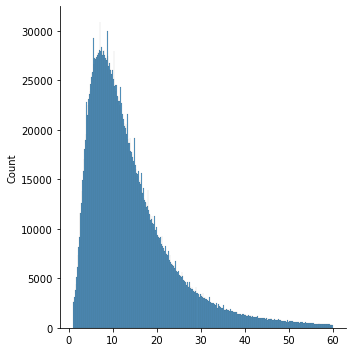

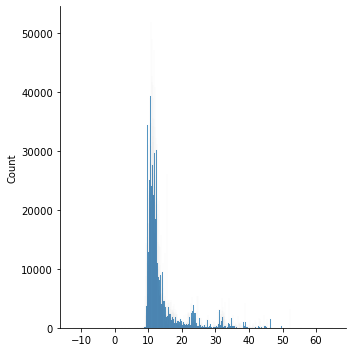

In [38]:
sns.displot(y_train, label = 'actual')
sns.displot(y_pred, label = 'predicted')
plt.show()